In [21]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [23]:
# Loading the data
Stock = pd.read_csv('/Users/narendranathreddy/Desktop/5502/Assignment 4/IBM.csv',  index_col=0)

In [24]:
df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()


,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2000-10-16,71.04,72.07,69.17,70.80,7710400,3.654238,81.314476,66.697524,69.49,65.70,...,71.051,74.9815,79.7930,1374.62,1374.17,1402.03,10238.80,10192.18,10568.43,71.99
2000-10-17,71.32,72.55,69.17,71.99,8882500,3.430448,80.486396,66.764604,70.80,69.49,...,70.550,74.3305,79.5488,1349.97,1374.62,1387.02,10089.71,10238.80,10524.40,60.80
2000-10-18,61.64,63.15,57.50,60.80,29777800,4.207529,81.106557,64.276443,71.99,70.80,...,69.885,73.6055,79.2676,1342.13,1349.97,1364.59,9975.02,10089.71,10413.79,61.44
2000-10-19,62.44,62.76,59.05,61.44,17966900,4.745871,81.384743,62.401257,60.80,71.99,...,69.814,73.4885,79.1532,1388.76,1342.13,1329.78,10142.98,9975.02,10034.58,60.37
2000-10-20,60.61,61.32,60.01,60.37,9369200,5.099733,81.164966,60.766034,61.44,60.80,...,70.103,73.1995,79.0922,1396.93,1388.76,1374.17,10226.59,10142.98,10192.18,59.17


In [25]:
df_Stock.tail(5)

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-07,123.50,125.07,123.21,124.96,3651000,2.213302,127.627603,118.774397,124.49,123.83,...,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,127.11
2020-08-10,125.42,127.24,125.18,127.11,3968300,1.962649,127.598799,119.748201,124.96,124.49,...,267.073,263.9970,252.9570,3360.47,3351.28,3294.61,27791.44,27433.48,26664.40,126.75
2020-08-11,128.76,130.47,126.61,126.75,5001200,1.750356,127.559712,120.558288,127.11,124.96,...,267.911,264.2380,253.5878,3333.69,3360.47,3306.51,27686.91,27791.44,26828.47,126.70
2020-08-12,127.61,127.79,125.88,126.70,3530200,1.728548,127.780595,120.866405,126.75,127.11,...,269.120,264.7860,254.3206,3380.35,3333.69,3327.77,27976.84,27686.91,27201.52,125.03
2020-08-13,125.96,126.39,124.77,125.03,3171300,1.674328,127.803156,121.105844,126.70,126.75,...,270.255,265.4540,255.0446,3373.43,3380.35,3349.16,27896.72,27976.84,27386.98,125.27


In [26]:
df_Stock.shape

(4988, 63)

In [27]:
df_Stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

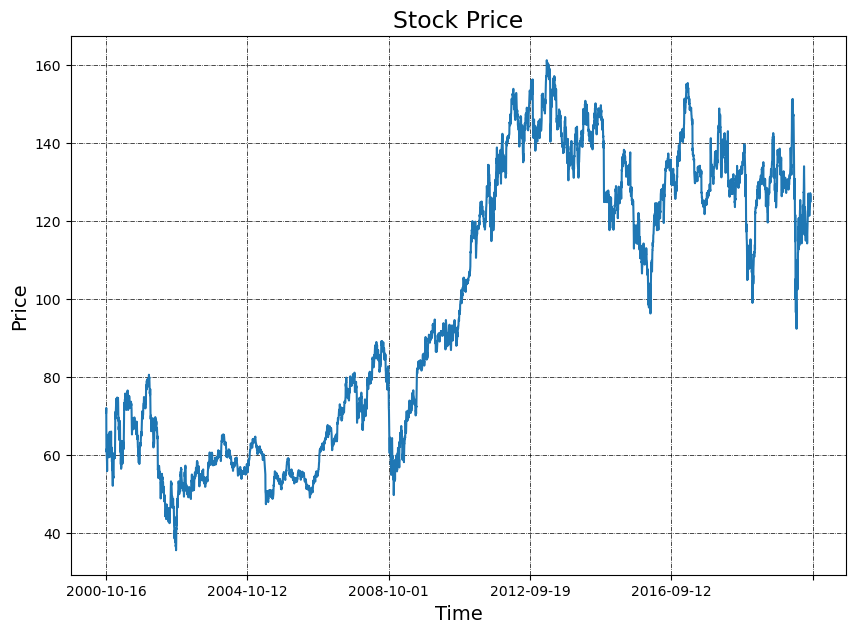

In [28]:
# Plot Time Series chart for IBM
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


In [29]:
# Remove some of the columns which are not required
df_Stock = df_Stock.drop(columns='Date_col')

In [30]:
# Test Train Set
def create_train_test_set(df_Stock):
    
    features = df_Stock.drop(columns=['Close_forcast'], axis=1)
    target = df_Stock['Close_forcast']
    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))
    
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

    


In [31]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Historical Stock Data length is -  4988
Training Set length -  4389
Validation Set length -  498
Test Set length -  99
(4389, 61) (498, 61) (101, 61)
(4389,) (498,) (101,)


In [32]:
# Prediction using Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)


LinearRegression()

In [33]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)


LR Coefficients: 
 [-7.21664954e-02  1.43180473e-01  1.96597613e-01  1.28374271e+00
 -6.40874169e-09  3.41177813e-03 -6.54501739e-02 -7.90973122e-02
  2.44985772e-01  1.98437566e-01  1.20844661e-01  6.73232076e-02
  1.89776679e-02  1.57519347e-01  3.22865095e-01 -7.22737449e-02
  3.50441875e-02  6.65264375e-03 -3.02058167e-01 -3.02058167e-01
 -3.02058167e-01 -3.02058167e-01 -3.02058167e-01 -1.26590703e+00
  1.06332081e+00  1.12808926e-02 -6.41034365e-04 -1.12544819e-13
  1.16383340e-02  1.01192482e-02 -1.48636031e-04 -1.48636031e-04
  1.46520783e-03 -2.49444465e-10  2.97353503e-10  2.50444233e-03
  1.37476913e-03 -1.61848648e-03 -1.16802207e-02  9.58030416e-02
 -7.10456377e-02  1.58053845e-01  5.29513850e-02 -2.36388099e-01
 -3.33066907e-16  6.41122966e-03  3.24225301e-02  9.29709701e-02
  1.58880452e-01 -2.31327875e-01  1.67091411e-02  7.76786985e-02
  2.06263175e-03 -2.71531331e-02  4.05270838e-03 -2.16288593e-02
  3.10871438e-02 -9.79274581e-03  1.47361118e-03 -2.22175512e-03
  7.56

In [34]:
# Performance
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9986629042221665
